**Desafío 3**

Alumno: Yandri Uchuari Gallardo

Crear sus propios vectores con Gensim basado en lo visto en clase con otro
dataset.

Probar términos de interés y explicar similitudes en el espacio de embeddings.
Intentar plantear y probar tests de analogías. Graficar los embeddings resultantes.

Sacar conclusiones.

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 662.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompati

[==================================================] 100.0% 31.6/31.6MB downloaded
Número de oraciones: 1701
Ejemplo oración: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']

Palabra base: king
  -> prince          similitud=0.7577
  -> queen           similitud=0.7227
  -> emperor         similitud=0.6972
  -> kings           similitud=0.6956
  -> vii             similitud=0.6907

Palabra base: woman
  -> child           similitud=0.7757
  -> girl            similitud=0.7475
  -> man             similitud=0.7149
  -> mother          similitud=0.6745
  -> herself         similitud=0.6624

Palabra base: computer
  -> computers       similitud=0.7211
  -> computing       similitud=0.6918
  -> programmer      similitud=0.6625
  -> pc              similitud=0.6423
  -> console         similitud=0.6389

Palabra base: space
  -> spacecraft      similitud=0

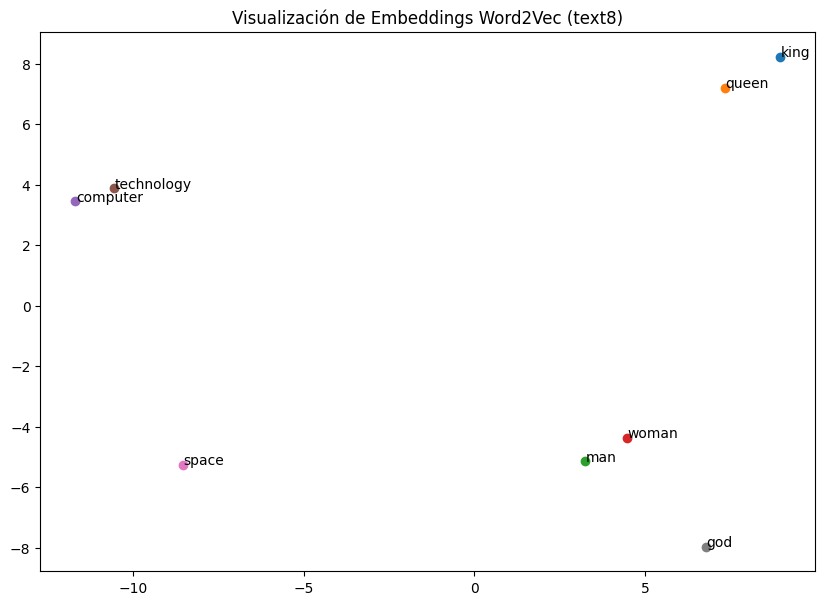

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ======================
# 1. Cargar dataset text8
# ======================
dataset = api.load("text8")  # devuelve un iterable de oraciones tokenizadas
data = list(dataset)  # Convertimos a lista para poder usar múltiples veces

print(f"Número de oraciones: {len(data)}")
print(f"Ejemplo oración: {data[0][:20]}")

# ======================
# 2. Entrenar modelo Word2Vec
# ======================
modelo_w2v = Word2Vec(sentences=data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

# ======================
# 3. Similaridades
# ======================
palabras_interes = ["king", "woman", "computer", "space", "god"]
for palabra in palabras_interes:
    if palabra in modelo_w2v.wv:
        print(f"\nPalabra base: {palabra}")
        for similar, score in modelo_w2v.wv.most_similar(palabra, topn=5):
            print(f"  -> {similar:15s} similitud={score:.4f}")
    else:
        print(f"\n'{palabra}' no está en el vocabulario")

# ======================
# 4. Analogías clásicas
# ======================
# rey - hombre + mujer ≈ reina
if all(w in modelo_w2v.wv for w in ["king", "man", "woman"]):
    resultado = modelo_w2v.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
    print("\nAnalogía: king - man + woman ≈", resultado)

# paris - francia + alemania ≈ berlin
if all(w in modelo_w2v.wv for w in ["paris", "france", "germany"]):
    resultado = modelo_w2v.wv.most_similar(positive=["paris", "germany"], negative=["france"], topn=1)
    print("Analogía: paris - france + germany ≈", resultado)

# ======================
# 5. Visualización PCA
# ======================
palabras_grafico = ["king", "queen", "man", "woman", "computer", "technology", "space", "god"]
vectores = [modelo_w2v.wv[w] for w in palabras_grafico if w in modelo_w2v.wv]
etiquetas = [w for w in palabras_grafico if w in modelo_w2v.wv]

pca = PCA(n_components=2)
reducidos = pca.fit_transform(vectores)

plt.figure(figsize=(10, 7))
for i, palabra in enumerate(etiquetas):
    plt.scatter(reducidos[i, 0], reducidos[i, 1])
    plt.text(reducidos[i, 0]+0.01, reducidos[i, 1]+0.01, palabra)
plt.title("Visualización de Embeddings Word2Vec (text8)")
plt.show()
